Mean Squared Error (First Model): 14304010.280542668
Linear Regression:
Mean Squared Error: 14304010.280542674
R-squared: 0.8188081868499235
Ridge Regression:
Mean Squared Error: 14327134.037321838
R-squared: 0.8185152735105534
Lasso Regression:
Mean Squared Error: 14296991.364079334
R-squared: 0.8188970968951065
ElasticNet Regression:
Mean Squared Error: 14405186.466004817
R-squared: 0.8175265674906008
Random Forest Regression:
Mean Squared Error: 6029553.094984927
R-squared: 0.9236224222202163
Support Vector Regression:
Mean Squared Error: 63067064.20526693
R-squared: 0.20111664566203935


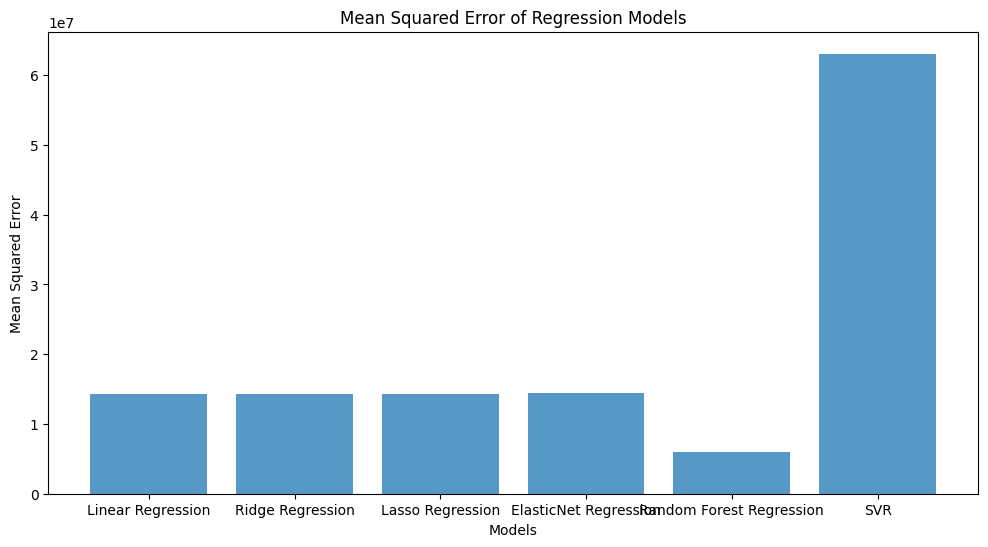

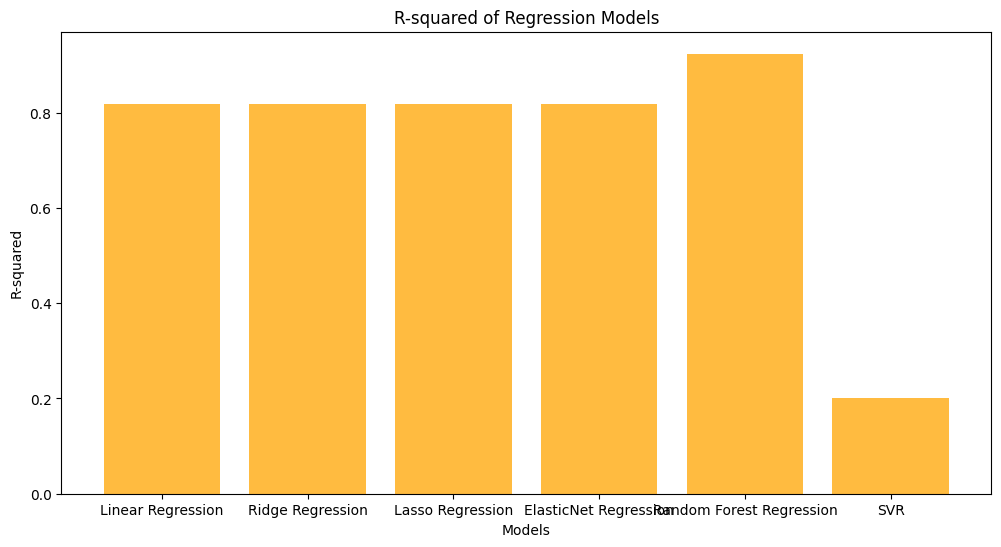

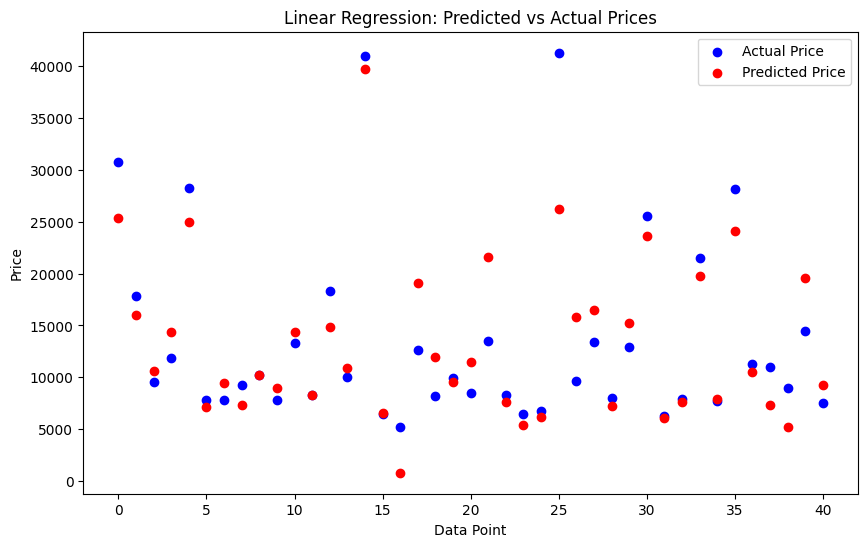

In [1]:
import pandas as pd
import numpy as  np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the car data from the CSV file
car_data = pd.read_csv(r"D:\Data Science intern\Car Price Pridiction\car details.csv")

# Ensure that 'symboling' is present in the column names
if 'symboling' in car_data.columns:
    # Define the features and target variables for the first code snippet
    features1 = ['symboling', 'curbweight', 'enginesize']
    target1 = 'price'

    # Split the data into features (X) and target variable (y)
    X1 = car_data[features1]
    y1 = car_data[target1]

    # Split the data into training and testing sets
    X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

    # Create and train the linear regression model
    model1 = LinearRegression()
    model1.fit(X1_train, y1_train)

    # Predict on the test set
    y1_pred = model1.predict(X1_test)

    # Calculate the mean squared error
    mse1 = mean_squared_error(y1_test, y1_pred)
    print("Mean Squared Error (First Model):", mse1)
else:
    print("The column 'symboling' does not exist in the dataset.")

# Read the car details from the CSV file
car_details = pd.read_csv(r"D:\Data Science intern\Car Price Pridiction\car details.csv")

# Ensure that categorical features exist in the DataFrame
missing_columns = set(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
                       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']) - set(car_details.columns)
if missing_columns:
    print('Missing columns:', missing_columns)
else:
    # Create a new DataFrame for the encoded data
    encoded_data = pd.get_dummies(car_details, columns=['fueltype', 'aspiration', 'doornumber',
                                                       'carbody', 'drivewheel', 'enginelocation',
                                                       'enginetype', 'cylindernumber', 'fuelsystem'],
                                 drop_first=True)

    # Define the features and target variables for the second code snippet
    features2 = features1
    target2 = 'price'

    # Split the data into features (X) and target variable (y)
    X2 = encoded_data[features2]
    y2 = encoded_data[target2]

    # Split the data into train and test sets
    X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X2_train_scaled = scaler.fit_transform(X2_train)
    X2_test_scaled = scaler.transform(X2_test)

    # Train and evaluate regression models
    # ...
    # Train and evaluate regression models

    # Linear Regression
    linear_model = LinearRegression()
    linear_model.fit(X2_train_scaled, y2_train)
    linear_pred = linear_model.predict(X2_test_scaled)
    linear_mse = mean_squared_error(y2_test, linear_pred)
    linear_r2 = r2_score(y2_test, linear_pred)
    print('Linear Regression:')
    print('Mean Squared Error:', linear_mse)
    print('R-squared:', linear_r2)

    # Ridge Regression
    ridge_model = Ridge()
    ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
    ridge_grid = GridSearchCV(ridge_model, ridge_params, cv=5)
    ridge_grid.fit(X2_train_scaled, y2_train)
    ridge_pred = ridge_grid.predict(X2_test_scaled)
    ridge_mse = mean_squared_error(y2_test, ridge_pred)
    ridge_r2 = r2_score(y2_test, ridge_pred)
    print('Ridge Regression:')
    print('Mean Squared Error:', ridge_mse)
    print('R-squared:', ridge_r2)

    # Lasso Regression
    lasso_model = Lasso()
    lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
    lasso_grid = GridSearchCV(lasso_model, lasso_params, cv=5)
    lasso_grid.fit(X2_train_scaled, y2_train)
    lasso_pred = lasso_grid.predict(X2_test_scaled)
    lasso_mse = mean_squared_error(y2_test, lasso_pred)
    lasso_r2 = r2_score(y2_test, lasso_pred)
    print('Lasso Regression:')
    print('Mean Squared Error:', lasso_mse)
    print('R-squared:', lasso_r2)

    # ElasticNet Regression
    elasticnet_model = ElasticNet()
    elasticnet_params = {'alpha': [0.001, 0.01, 0.1, 1, 10],
                         'l1_ratio': [0.25, 0.5, 0.75]}
    elasticnet_grid = GridSearchCV(elasticnet_model, elasticnet_params, cv=5)
    elasticnet_grid.fit(X2_train_scaled, y2_train)
    elasticnet_pred = elasticnet_grid.predict(X2_test_scaled)
    elasticnet_mse = mean_squared_error(y2_test, elasticnet_pred)
    elasticnet_r2 = r2_score(y2_test, elasticnet_pred)
    print('ElasticNet Regression:')
    print('Mean Squared Error:', elasticnet_mse)
    print('R-squared:', elasticnet_r2)

    # Random Forest Regression
    rf_model = RandomForestRegressor(random_state=42)
    rf_params = {'n_estimators': [100, 200, 300, 400, 500],
                 'max_depth': [None, 5, 10, 15, 20]}
    rf_grid = GridSearchCV(rf_model, rf_params, cv=5)
    rf_grid.fit(X2_train_scaled, y2_train)
    rf_pred = rf_grid.predict(X2_test_scaled)
    rf_mse = mean_squared_error(y2_test, rf_pred)
    rf_r2 = r2_score(y2_test, rf_pred)
    print('Random Forest Regression:')
    print('Mean Squared Error:', rf_mse)
    print('R-squared:', rf_r2)

    # Support Vector Regression
    svr_model = SVR()
    svr_params = {'C': [0.1, 1, 10, 100],
                  'gamma': [0.001, 0.01, 0.1, 1]}
    svr_grid = GridSearchCV(svr_model, svr_params, cv=5)
    svr_grid.fit(X2_train_scaled, y2_train)
    svr_pred = svr_grid.predict(X2_test_scaled)
    svr_mse = mean_squared_error(y2_test, svr_pred)
    svr_r2 = r2_score(y2_test, svr_pred)
    print('Support Vector Regression:')
    print('Mean Squared Error:', svr_mse)
    print('R-squared:', svr_r2)
    # Plotting the predictions
    plt.figure(figsize=(12, 6))
    models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
              'ElasticNet Regression', 'Random Forest Regression', 'SVR']
    mse_scores = [linear_mse, ridge_mse, lasso_mse, elasticnet_mse, rf_mse, svr_mse]
    r2_scores = [linear_r2, ridge_r2, lasso_r2, elasticnet_r2, rf_r2, svr_r2]
    plt.bar(models, mse_scores, alpha=0.75)
    plt.xlabel('Models')
    plt.ylabel('Mean Squared Error')
    plt.title('Mean Squared Error of Regression Models')
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.bar(models, r2_scores, color='orange', alpha=0.75)
    plt.xlabel('Models')
    plt.ylabel('R-squared')
    plt.title('R-squared of Regression Models')
    plt.show()
    

# Plot the predicted prices and actual prices for the linear regression model
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(y2_test)), y2_test, color='b', label='Actual Price')
plt.scatter(np.arange(len(y2_test)), linear_pred, color='r', label='Predicted Price')
plt.xlabel('Data Point')
plt.ylabel('Price')
plt.title('Linear Regression: Predicted vs Actual Prices')
plt.legend()
plt.show()